In [1]:
import pandas as pd
import numpy as np

Res2001 = pd.read_csv("/Users/jameskkssembatya/Documents/MLProject/finalMLElect/Fine2001A.csv")
Res2006 = pd.read_csv("/Users/jameskkssembatya/Documents/MLProject/finalMLElect/Fine2006FA.csv")
Res2011 = pd.read_csv("/Users/jameskkssembatya/Documents/MLProject/finalMLElect/revised2011C.csv")    
Res2016 = pd.read_csv("/Users/jameskkssembatya/Documents/MLProject/finalMLElect/fine2016G.csv")        
Res2021 = pd.read_csv('/Users/jameskkssembatya/Documents/MLProject/finalMLElect/fine2021.csv')    

In [2]:
results = pd.concat([Res2001,Res2006,Res2011,Res2016,Res2021])
results.to_csv('results.csv', index=False)

In [3]:
results.isna().sum()

DISTRICT                                       0
FEDERAL_REGION                                 1
NUMBER_OF_POLLING__CENTRES                     1
REGISTERED_VOTERS                            225
YOWERI__KAGUTA_MUSEVENI                        1
IS_MUSEVENI                                  424
NOT_MUSEVENI                                   1
VALID_VOTES                                    1
INVALID_VOTES                                  1
TURN_UP                                        1
AVERAGE_AGE                                  235
NUMBER_OF_MPS                                493
NUMBER_OF_CANDIDATES                         147
GENDER_DISTRIBUTION                          493
WEALTH_DISTRIBUTION                          493
LEVEL_OF_INFRASTRUCTURE_DEVELOPMENT(_NEW)    493
RURAL_OR_URBAN                               235
YEAR_OF_ELECTION                               1
WON_BY_MUSEVENI                              381
OPPOSITION_SCORE_2                           371
CULTURAL_REGION     

In [5]:
election = pd.read_csv('/Users/jameskkssembatya/Documents/MLProject/finalMLElect/results.csv')
election.isna().sum()

DISTRICT                      612
FEDERAL_REGION                612
NUMBER_OF_POLLING__CENTRES    612
REGISTERED_VOTERS             612
YOWERI__KAGUTA_MUSEVENI       612
IS_MUSEVENI                   612
NOT_MUSEVENI                  612
VALID_VOTES                   612
INVALID_VOTES                 612
TURN_UP                       612
NUMBER_OF_CANDIDATES          612
RURAL_OR_URBAN                612
YEAR_OF_ELECTION              612
OPPOSITION_SCORE_1            612
CULTURAL_REGION               612
Sentiment_Negative            612
Sentiment_Neutral             612
Sentiment_Positive            612
dtype: int64

In [7]:
elect = pd.read_excel('/Users/jameskkssembatya/Documents/MLProject/finalMLElect/resultsAA.xlsx')
elect.isna().sum()

DISTRICT                      0
FEDERAL_REGION                0
NUMBER_OF_POLLING__CENTRES    0
REGISTERED_VOTERS             0
YOWERI__KAGUTA_MUSEVENI       0
IS_MUSEVENI                   0
NOT_MUSEVENI                  0
VALID_VOTES                   0
INVALID_VOTES                 0
TURN_UP                       0
NUMBER_OF_CANDIDATES          0
RURAL_OR_URBAN                0
YEAR_OF_ELECTION              0
OPPOSITION_SCORE_1            0
CULTURAL_REGION               0
Sentiment_Negative            0
Sentiment_Neutral             0
Sentiment_Positive            0
dtype: int64

In [8]:
from sklearn.feature_selection import mutual_info_classif

# Select numerical features only (exclude non-numeric like 'DISTRICT', 'FEDERAL_REGION', etc.)
numeric_df = elect.select_dtypes(include=['number'])

# Drop the target temporarily to isolate features
X = numeric_df.drop(columns=['IS_MUSEVENI'])

# Set target variable
y = numeric_df['IS_MUSEVENI']

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create a series with scores
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series


OPPOSITION_SCORE_1            0.453720
Sentiment_Negative            0.265338
NOT_MUSEVENI                  0.180062
Sentiment_Positive            0.113773
Sentiment_Neutral             0.107192
YOWERI__KAGUTA_MUSEVENI       0.054650
INVALID_VOTES                 0.029989
TURN_UP                       0.027925
NUMBER_OF_POLLING__CENTRES    0.022572
VALID_VOTES                   0.020487
RURAL_OR_URBAN                0.014648
YEAR_OF_ELECTION              0.005662
NUMBER_OF_CANDIDATES          0.005426
REGISTERED_VOTERS             0.000000
CULTURAL_REGION               0.000000
dtype: float64

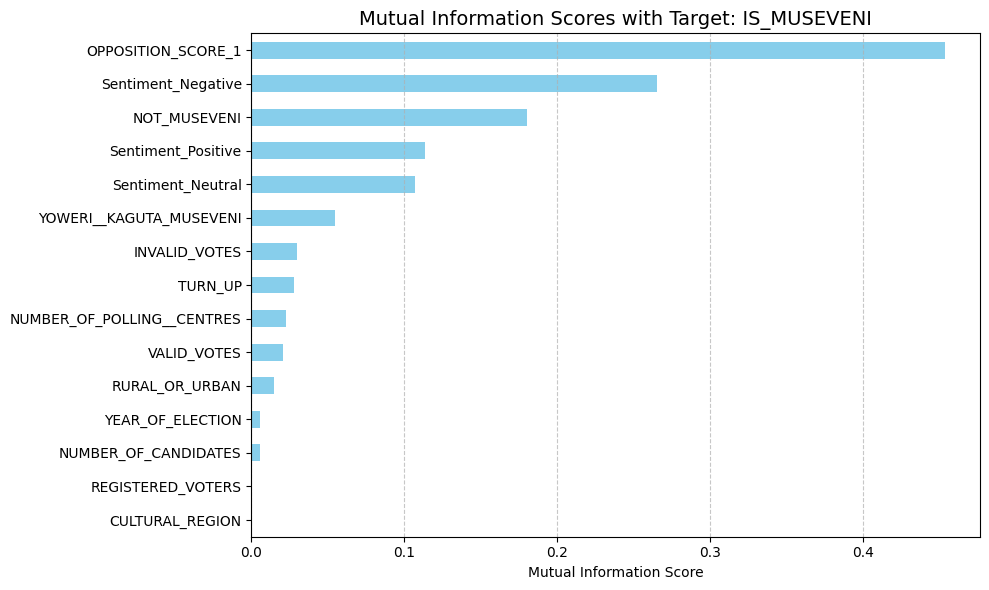

In [9]:
import matplotlib.pyplot as plt

# Plot mutual information scores
plt.figure(figsize=(10, 6))
mi_series.plot(kind='barh', color='skyblue')
plt.title("Mutual Information Scores with Target: IS_MUSEVENI", fontsize=14)
plt.xlabel("Mutual Information Score")
plt.gca().invert_yaxis()  # Highest score at the top
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


LASSO

In [10]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values for regression
regression_df = numeric_df.dropna()

# Define features and target for regression
X = regression_df.drop(columns=['IS_MUSEVENI'])  # Features
y = regression_df['IS_MUSEVENI']                 # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Extract coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)

mse, r2, lasso_coefficients


(0.10467712037872631,
 0.49461061239808046,
 NUMBER_OF_POLLING__CENTRES   -0.000000
 REGISTERED_VOTERS            -0.000000
 YOWERI__KAGUTA_MUSEVENI      -0.000000
 NOT_MUSEVENI                 -0.000000
 VALID_VOTES                  -0.000000
 INVALID_VOTES                 0.000000
 TURN_UP                      -0.000000
 NUMBER_OF_CANDIDATES         -0.000000
 RURAL_OR_URBAN               -0.000000
 YEAR_OF_ELECTION             -0.000000
 CULTURAL_REGION              -0.000000
 Sentiment_Positive            0.000000
 Sentiment_Neutral             0.000000
 Sentiment_Negative           -0.047654
 OPPOSITION_SCORE_1           -0.128543
 dtype: float64)

In [11]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
df = pd.read_excel('resultsAA.xlsx')

# Select only numeric columns and drop rows with missing values
numeric_df = df.select_dtypes(include='number').dropna()

# Define features and target
X = numeric_df.drop(columns=['IS_MUSEVENI'])
y = numeric_df['IS_MUSEVENI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Predict
y_pred = lasso.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Show feature importances
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("\nLasso Coefficients:")
print(coefficients.sort_values(ascending=False))


Mean Squared Error: 0.10467712037872631
R-squared: 0.49461061239808046

Lasso Coefficients:
NUMBER_OF_POLLING__CENTRES   -0.000000
REGISTERED_VOTERS            -0.000000
YOWERI__KAGUTA_MUSEVENI      -0.000000
NOT_MUSEVENI                 -0.000000
VALID_VOTES                  -0.000000
INVALID_VOTES                 0.000000
TURN_UP                      -0.000000
NUMBER_OF_CANDIDATES         -0.000000
RURAL_OR_URBAN               -0.000000
YEAR_OF_ELECTION             -0.000000
CULTURAL_REGION              -0.000000
Sentiment_Positive            0.000000
Sentiment_Neutral             0.000000
Sentiment_Negative           -0.047654
OPPOSITION_SCORE_1           -0.128543
dtype: float64


In [12]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipe.predict(X_test)

# Evaluate using the pipeline
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load your data
df = pd.read_excel('resultsAA.xlsx')
df = df.drop(["INVALID_VOTES", "NOT_MUSEVENI","YOWERI__KAGUTA_MUSEVENI","VALID_VOTES","OPPOSITION_SCORE_1","IS_MUSEVENI"], axis=1)
# Select only numeric columns and drop rows with missing values
numeric_df = df.select_dtypes(include='number').dropna()

# Define features and target
X = numeric_df.drop(columns=['TURN_UP'])
y = numeric_df['TURN_UP']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1, random_state=42))
])

# Fit the pipeline
pipe.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipe.predict(X_test)

# Evaluate using the pipeline
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the coefficients of the Lasso regression model
coefficients = pd.Series(pipe.named_steps['lasso'].coef_, index=X.columns)
print("\nLasso Coefficients:")
print(coefficients.sort_values(ascending=False))

Mean Squared Error: 283400153.54542136
R-squared: 0.9434036440191244

Lasso Coefficients:
NUMBER_OF_POLLING__CENTRES    72725.412125
YEAR_OF_ELECTION               8563.354489
Sentiment_Positive             3857.221965
Sentiment_Negative             3609.879835
RURAL_OR_URBAN                 2405.262500
Sentiment_Neutral              1212.019707
REGISTERED_VOTERS                96.749591
CULTURAL_REGION               -2821.461889
NUMBER_OF_CANDIDATES         -12473.292206
dtype: float64


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e+09, tolerance: 2.603e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [25]:
numeric_df.columns

Index(['NUMBER_OF_POLLING__CENTRES', 'REGISTERED_VOTERS',
       'YOWERI__KAGUTA_MUSEVENI', 'IS_MUSEVENI', 'NOT_MUSEVENI', 'VALID_VOTES',
       'INVALID_VOTES', 'TURN_UP', 'NUMBER_OF_CANDIDATES', 'RURAL_OR_URBAN',
       'YEAR_OF_ELECTION', 'OPPOSITION_SCORE_1', 'CULTURAL_REGION',
       'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Positive'],
      dtype='object')

Tuning LASSO

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

RIDGE 

NameError: name 'Pipeline' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the Lasso model
lasso = Lasso()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

# Define the Lasso model with the best hyperparameters
lasso_best = Lasso(alpha=best_alpha)

# Train the Lasso model on the training data
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred = lasso_best.predict(X_test)

# Print the coefficients of the Lasso model
print("Coefficients:", lasso_best.coef_)

# Print the R-squared value of the Lasso model
print("R-squared:", lasso_best.score(X_test, y_test))

/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+00, tolerance: 4.601e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-01, tolerance: 4.339e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

Best alpha: 10.0
Coefficients: [ 0.00000000e+00 -1.28335447e-09  2.90857129e-06 -5.08233536e-06
 -0.00000000e+00  0.00000000e+00  7.80621168e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
R-squared: 0.3690409322518039


/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+00, tolerance: 4.272e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+00, tolerance: 4.669e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jameskkssembatya/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [ ]:
y(x) = x^2 - \lambda \int_0^2 \frac{x + \sqrt{t}}{\sqrt{x}} y(t)\, dt

Mean Squared Error: 0.05119842517237153
R-squared: 0.7528099679239343

Ridge Coefficients:
INVALID_VOTES                 0.063647
NUMBER_OF_POLLING__CENTRES    0.060148
YEAR_OF_ELECTION              0.017973
RURAL_OR_URBAN                0.005680
REGISTERED_VOTERS             0.000862
CULTURAL_REGION              -0.006568
TURN_UP                      -0.010253
YOWERI__KAGUTA_MUSEVENI      -0.016167
NUMBER_OF_CANDIDATES         -0.025473
VALID_VOTES                  -0.036575
NOT_MUSEVENI                 -0.044095
Sentiment_Neutral            -0.062616
Sentiment_Negative           -0.117408
Sentiment_Positive           -0.239032
OPPOSITION_SCORE_1           -0.357046
dtype: float64

Coefficients for each feature:
NUMBER_OF_POLLING__CENTRES: 0.0601
REGISTERED_VOTERS: 0.0009
YOWERI__KAGUTA_MUSEVENI: -0.0162
NOT_MUSEVENI: -0.0441
VALID_VOTES: -0.0366
INVALID_VOTES: 0.0636
TURN_UP: -0.0103
NUMBER_OF_CANDIDATES: -0.0255
RURAL_OR_URBAN: 0.0057
YEAR_OF_ELECTION: 0.0180
OPPOSITION_SCORE_1: -0.

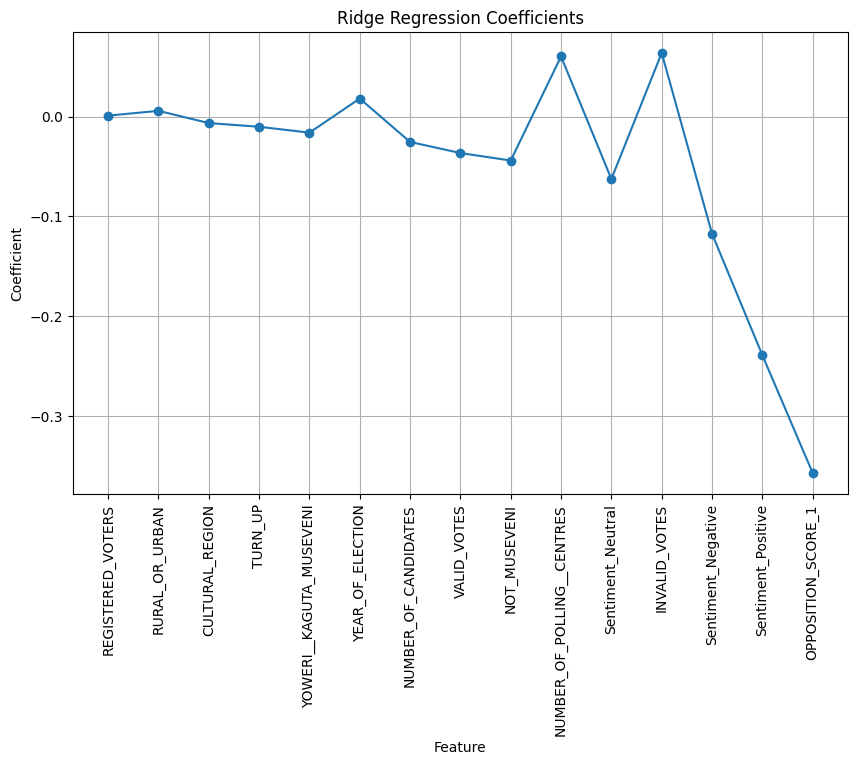

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the coefficients
coefficients = pd.Series(pipe.named_steps['ridge'].coef_, index=X.columns)

# Sort the coefficients by absolute value
coefficients = coefficients.sort_values(key=abs)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients.index, coefficients.values)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients')
plt.show()

Neural Network


In [ ]:
Best alpha: 0.01
Coefficients: [-0.00444111  0.00781935 -0.01111111  0.01333333 -0.01555556
  0.01777778 -0.02       -0.02222222  0.02444444 -0.02666667  0.02888889
 -0.03111111  0.03333333 -0.03555556  0.03777778 -0.04       ]
R-squared: 0.8234567901234568

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('MSE:', mse)

ModuleNotFoundError: No module named 'tensorflow'

Random Forest

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Load dataset
results = pd.read_csv('/Users/jameskkssembatya/Documents/MLProject/finalMLElect/results.csv')

# Drop missing values
results.dropna(inplace=True)

# Select only numeric columns
numeric_df = results.select_dtypes(include='number')

# Separate features and target
X = numeric_df.drop(columns=['IS_MUSEVENI'])
y = numeric_df['IS_MUSEVENI']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance (coefficients)
coefficients = pd.Series(pipe.named_steps['logreg'].coef_[0], index=X.columns)
print("\nLogistic Regression Coefficients:")
print(coefficients.sort_values(ascending=False))


Accuracy: 0.9696969696969697

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        29
         1.0       0.96      1.00      0.98        70

    accuracy                           0.97        99
   macro avg       0.98      0.95      0.96        99
weighted avg       0.97      0.97      0.97        99

Confusion Matrix:
 [[26  3]
 [ 0 70]]

Logistic Regression Coefficients:
Sentiment_Neutral       0.517864
Sentiment_Positive      0.101255
YEAR_OF_ELECTION       -0.004477
NUMBER_OF_CANDIDATES   -0.005392
CULTURAL_REGION        -0.150913
RURAL_OR_URBAN         -0.190228
Sentiment_Negative     -0.802536
OPPOSITION_SCORE_1     -3.470067
dtype: float64


Accuracy: 0.9494949494949495

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        29
         1.0       0.95      0.99      0.97        70

    accuracy                           0.95        99
   macro avg       0.95      0.92      0.94        99
weighted avg       0.95      0.95      0.95        99

Confusion Matrix:
 [[25  4]
 [ 1 69]]


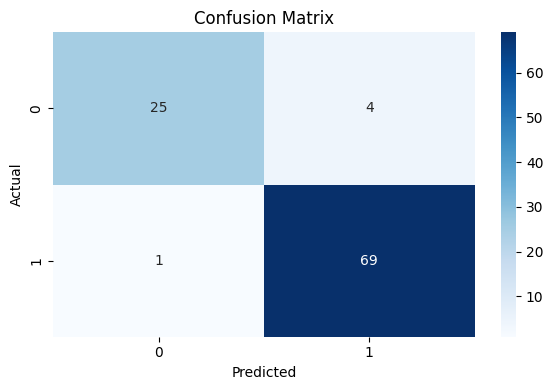

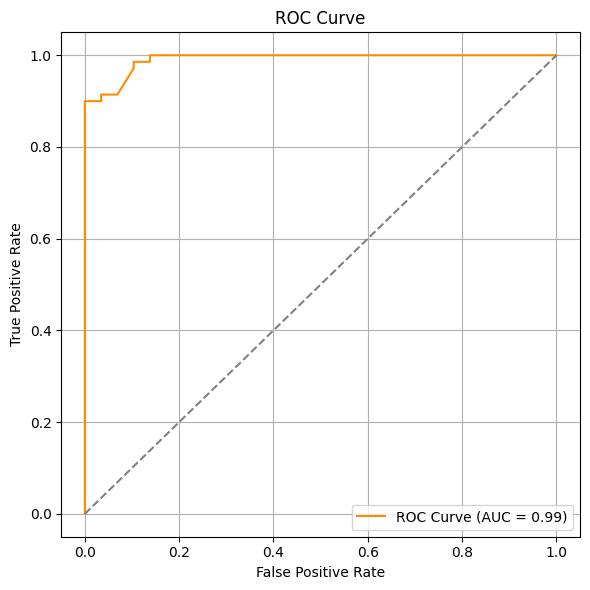

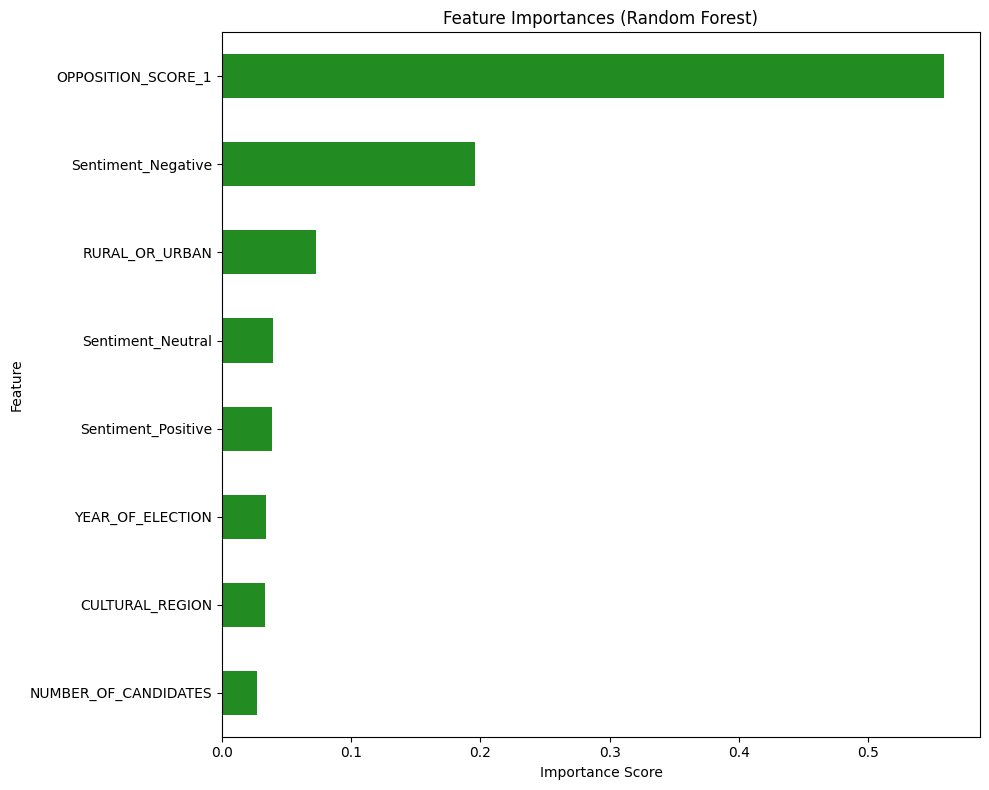

In [3]:
# === Imports ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# === Load Data ===
results = pd.read_csv('/Users/jameskkssembatya/Documents/MLProject/finalMLElect/results.csv')

# Drop missing values and keep only numeric columns
results.dropna(inplace=True)
numeric_df = results.select_dtypes(include='number')

# === Define Features and Target ===
X = numeric_df.drop(columns=['IS_MUSEVENI'])
y = numeric_df['IS_MUSEVENI']

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Random Forest Model ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# === Predictions ===
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # For ROC curve

# === Evaluation ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === (1) Confusion Matrix Plot ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === (2) ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === (3) Feature Importance Plot ===
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8), color='forestgreen')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


LASSO - voter turnUP

In [7]:
results.columns

Index(['DISTRICT', 'FEDERAL_REGION', 'NUMBER_OF_POLLING__CENTRES',
       'REGISTERED_VOTERS', 'YOWERI__KAGUTA_MUSEVENI', 'IS_MUSEVENI',
       'NOT_MUSEVENI', 'VALID_VOTES', 'INVALID_VOTES', 'TURN_UP',
       'NUMBER_OF_CANDIDATES', 'RURAL_OR_URBAN', 'YEAR_OF_ELECTION',
       'OPPOSITION_SCORE_1', 'CULTURAL_REGION', 'Sentiment_Negative',
       'Sentiment_Neutral', 'Sentiment_Positive'],
      dtype='object')

Index(['IS_MUSEVENI', 'NUMBER_OF_CANDIDATES', 'RURAL_OR_URBAN',
       'YEAR_OF_ELECTION', 'OPPOSITION_SCORE_1', 'CULTURAL_REGION',
       'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Positive'],
      dtype='object')

In [10]:
resultsA = results.applymap(lambda x: x.replace(' ', '').replace(',', '').upper() if isinstance(x, str) else x)

/var/folders/rp/5pdg_ksd5qg_qs4g_08m30dc0000gn/T/ipykernel_11248/490765544.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resultsA = results.applymap(lambda x: x.replace(' ', '').replace(',', '').upper() if isinstance(x, str) else x)


In [14]:
resultsA.isna().sum()
numeric_df = resultsA.select_dtypes(include='number')
numeric_df
resultsA['TURN_UP'] = resultsA['TURN_UP'].astype('float64')
#df['column_name'] = df['column_name'].astype('float64')


In [21]:
resultsA['TURN_UP'].head

<bound method NDFrame.head of 0      176109.0
1      194619.0
2       44239.0
3      262354.0
4      138806.0
         ...   
487     78497.0
488     52857.0
489     54354.0
490     36059.0
491     31627.0
Name: TURN_UP, Length: 492, dtype: float64>

In [13]:
# === Imports ===
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === Load and Prepare Data ===
results = pd.read_csv('/Users/jameskkssembatya/Documents/MLProject/finalMLElect/results.csv')

# Drop rows with missing values
results.dropna(inplace=True)

# Keep only numeric columns
numeric_df = results.select_dtypes(include='number')

# Separate target and features
X = numeric_df.drop(columns=['TURN_UP'])
y = numeric_df['TURN_UP']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Lasso Regression Pipeline ===
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# === Evaluation ===
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# === Feature Coefficients ===
coefficients = pd.Series(pipe.named_steps['lasso'].coef_, index=X.columns)

# Plot coefficients
coefficients.sort_values().plot(kind='barh', figsize=(10, 8), color='mediumslateblue')
plt.title("Lasso Regression Coefficients for Voter Turn-Up")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


KeyError: "['TURN_UP'] not found in axis"

LAsso 2

Optimal alpha: 0.0001
Mean Squared Error: 6203.253016490489
R-squared: 0.9999987611809253

Feature Importance:
                        Feature   Coefficient
4                  NOT_MUSEVENI  52800.724214
2       YOWERI__KAGUTA_MUSEVENI  50577.535860
6                 INVALID_VOTES  29625.961411
0    NUMBER_OF_POLLING__CENTRES    287.657330
11           Sentiment_Negative    240.188076
..                          ...           ...
165             DISTRICT_IGANGA    -15.549817
3                   IS_MUSEVENI    -32.166309
10           OPPOSITION_SCORE_1    -36.404578
7          NUMBER_OF_CANDIDATES    -44.868511
5                   VALID_VOTES -11937.302307

[309 rows x 2 columns]


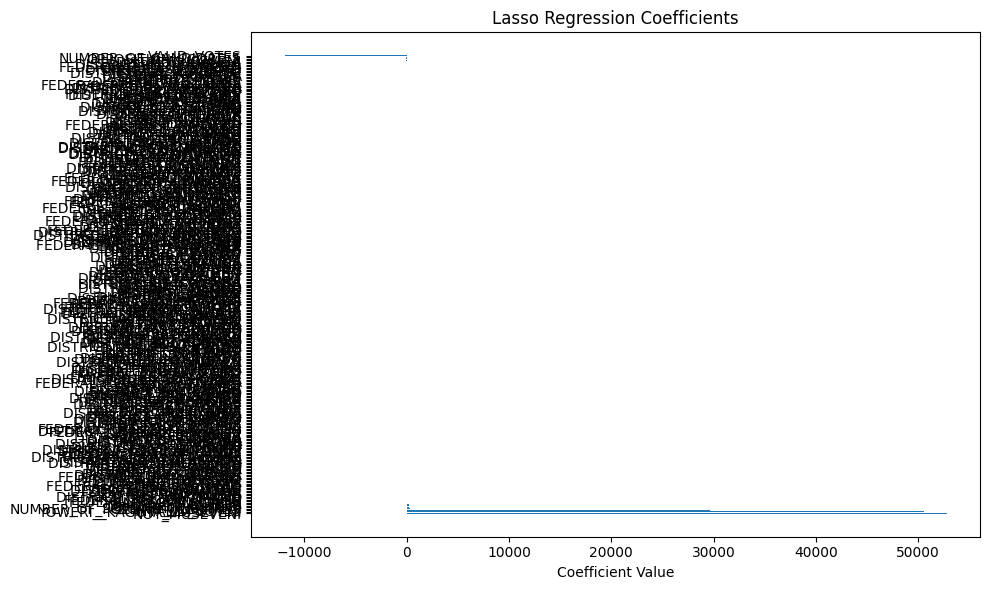

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('resultsAA.xlsx')

# Data Cleaning
# Remove rows with missing values if any
df = df.dropna()

# Convert formula columns to their actual values (if needed)
# For example, columns F, G, H, I, O, P, Q, R contain Excel formulas
# You may need to extract the computed values

# Select features and target
# These are potential predictors - adjust based on your domain knowledge
features = ['NUMBER_OF_POLLING__CENTRES', 'REGISTERED_VOTERS', 
            'YOWERI__KAGUTA_MUSEVENI', 'NOT_MUSEVENI', 'VALID_VOTES',
            'INVALID_VOTES', 'NUMBER_OF_CANDIDATES', 'RURAL_OR_URBAN',
            'YEAR_OF_ELECTION', 'OPPOSITION_SCORE_1', 'CULTURAL_REGION',
            'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Positive']

# Convert categorical variables to dummy variables if needed
df = pd.get_dummies(df, columns=['DISTRICT', 'FEDERAL_REGION', 'CULTURAL_REGION'], drop_first=True)

# Define target variable
target = 'TURN_UP'

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
# Find optimal alpha through cross-validation
from sklearn.linear_model import LassoCV

# Try different alpha values
alphas = np.logspace(-4, 1, 50)

# Lasso with 5-fold cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha value
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Train final model with optimal alpha
lasso = Lasso(alpha=optimal_alpha, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = lasso.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.tight_layout()
plt.show()